In [2]:
import pandas as pd
import requests 
import matplotlib.pyplot as plt
import numpy as np

In [2]:
from bs4 import BeautifulSoup

In [14]:
Highest = requests.get(r"https://www.rottentomatoes.com/browse/movies_at_home/sort:audience_highest?page=14")
Lowest = requests.get(r"https://www.rottentomatoes.com/browse/movies_at_home/sort:audience_lowest?page=14")
Popular = requests.get(r"https://www.rottentomatoes.com/browse/movies_at_home/sort:popular?page=14")
Newest =  requests.get(r"https://www.rottentomatoes.com/browse/movies_at_home/sort:newest?page=14")
netflix = requests.get(r"https://www.rottentomatoes.com/browse/movies_at_home/affiliates:netflix?page=14")
prime = requests.get(r'https://www.rottentomatoes.com/browse/movies_at_home/affiliates:amazon_prime,netflix?page=14')
G_rating = requests.get(r'https://www.rottentomatoes.com/browse/movies_at_home/affiliates:amazon_prime,netflix~ratings:g?page=14')
PG_rating = requests.get(r'https://www.rottentomatoes.com/browse/movies_at_home/affiliates:amazon_prime,netflix~ratings:pg?page=14')
PG13_rating = requests.get(r'https://www.rottentomatoes.com/browse/movies_at_home/affiliates:amazon_prime,netflix~ratings:pg_13?page=14')
R_rating = requests.get(r'https://www.rottentomatoes.com/browse/movies_at_home/affiliates:amazon_prime,netflix~ratings:r?page=14')
nc_17_rating = requests.get(r'https://www.rottentomatoes.com/browse/movies_at_home/affiliates:amazon_prime,netflix~ratings:nc_17')
more_than60_rating = requests.get(r'https://www.rottentomatoes.com/browse/movies_at_home/affiliates:amazon_prime,netflix~audience:upright?page=14')
less_than60_rating = requests.get(r'https://www.rottentomatoes.com/browse/movies_at_home/affiliates:amazon_prime,netflix~audience:spilled?page=14')
Highest_data = BeautifulSoup(Highest.content)
Lowest_data = BeautifulSoup(Lowest.content)
Popular_data = BeautifulSoup(Popular.content)
Newest_data = BeautifulSoup(Newest.content)
netflix_data = BeautifulSoup(netflix.content)
prime_data = BeautifulSoup(prime.content)
G_rating_data = BeautifulSoup(G_rating.content)
PG_rating_data = BeautifulSoup(PG_rating.content)
PG13_rating_data = BeautifulSoup(PG13_rating.content)
R_rating_data = BeautifulSoup(R_rating.content)
nc_17_rating_data = BeautifulSoup(nc_17_rating.content)
more_than60_data = BeautifulSoup(more_than60_rating.content)
less_than60_data = BeautifulSoup(less_than60_rating.content)


In [15]:
web = 'https://www.rottentomatoes.com'
urls = []
for _ in Highest_data.find_all('div','js-tile-link'):
    urls.append(web+_.find('a')['href'])
    
for _ in Lowest_data.find_all('div','js-tile-link'):
    urls.append(web+_.find('a')['href'])
    
for _ in Popular_data.find_all('div','js-tile-link'):
    urls.append(web+_.find('a')['href'])
    
for _ in Newest_data.find_all('div','js-tile-link'):
    urls.append(web+_.find('a')['href'])
    
for _ in netflix_data.find_all('div','js-tile-link'):
    urls.append(web+_.find('a')['href'])
    
for _ in prime_data.find_all('div','js-tile-link'):
    urls.append(web+_.find('a')['href'])
    
for _ in G_rating_data.find_all('div','js-tile-link'):
    urls.append(web+_.find('a')['href'])
    
for _ in PG_rating_data.find_all('div','js-tile-link'):
    urls.append(web+_.find('a')['href'])
    
for _ in PG13_rating_data.find_all('div','js-tile-link'):
    urls.append(web+_.find('a')['href'])
    
for _ in R_rating_data.find_all('div','js-tile-link'):
    urls.append(web+_.find('a')['href'])
    
for _ in nc_17_rating_data.find_all('div','js-tile-link'):
    urls.append(web+_.find('a')['href'])
    
for _ in more_than60_data.find_all('div','js-tile-link'):
    urls.append(web+_.find('a')['href'])
    
for _ in less_than60_data.find_all('div','js-tile-link'):
    urls.append(web+_.find('a')['href'])

In [16]:
len(urls)

1140

In [23]:
titles=[]
year=[]
Genre=[]
time =[]
num_of_rating=[]
rev=[]
Writer =[]
producer=[]
rating = []
buy_tic = []
age=[]
for i in urls:
    file3=requests.get(f"{i}")
    data=BeautifulSoup(file3.content)
    titles.append(data.find('h1','scoreboard__title').contents[0])
    aud_rat = data.find('a','scoreboard__link scoreboard__link--audience').contents[0].strip().replace('\n','')
    num_of_rating.append(aud_rat)
    Rev = data.find('a','scoreboard__link scoreboard__link--tomatometer').contents[0].strip().split(" ")
    rev.append(Rev[0])
    info_item = data.find_all("span","info-item-value")
    label = data.find_all("b","info-item-label")
    for i in range (len(label)):
        if(label[i].text=='Producer:'):
            prod=info_item[i].text.strip().replace('\n','')
            producer.append(prod.replace(' ',''))
        if(label[i].text=='Writer:'):
            wri = info_item[i].text.strip().replace('\n','')
            Writer.append(wri.replace(' ',''))
        if(label[i].text=='Release Date (Theaters):'):
            buy_tic.append(info_item[i].text.strip().replace('\n',''))
        if(label[i].text=='Runtime:'):
            time.append(info_item[i].text.strip().replace('\n',''))
        if(label[i].text=='Genre:'):
            cni=info_item[i].text.strip().replace('\n','')
            Genre.append(cni.replace(' ',''))
        if(label[i].text=='Release Date (Streaming):'):
            year.append(info_item[i].text.strip().replace('\n',''))
        
    if(len(titles)>len(producer)):
        producer.append("Null")
    if(len(titles)>len(Writer)):
        Writer.append("Null")
    if(len(titles)>len(buy_tic)):
        buy_tic.append("Null")
    if(len(titles)>len(time)):
        time.append("Null")
    if(len(titles)>len(Genre)):
        Genre.append("Null")
    if(len(titles)>len(year)):
        year.append("Null")
    rating.append(data.find('score-board')['audiencescore'])
    if data.find_all('b','info-item-label')[0].contents[0][:-1] == 'Rating':
        age.append(data.find_all('span','info-item-value')[0].contents[0].strip().split(' ')[0])
    else :
        age.append('All')

In [ ]:
films={"Title":titles ,"Genre":Genre ,"year":year ,"time":time ,"Num of rating":num_of_rating ,
                        "Num of reveiws":rev , "Writer":Writer,"producer":producer , "Rating" :rating , 
                        "Tickets bought":buy_tic ,"Age":age}
films_data=pd.DataFrame(films)

In [1]:
#films_data.to_csv('films_data.csv')

In [35]:
df = pd.read_csv('films_data.csv')
df['time'] = df['time'].replace('Null','0')
df['time'] = df['time'].str.replace('h',":").str.replace("m","").str.replace(' ', '')
df['year'] = df['year'].str.split(',', expand=True)[1].str.strip()
df['Tickets bought'] = df['Tickets bought'].str.split(',', expand=True)[1].str.strip()
df['Tickets bought']  = df['Tickets bought'].str[4:]
df['Tickets bought']=df['Tickets bought'].replace({'limited': 1, 'original': 2, 'wide': 3})
df['Num of rating'] = df['Num of rating'].str.replace('Ratings','').str.replace('Fewer than','>').str.replace('Verified','V').str.strip()
df = df.assign(Genre=df['Genre'].str.split(',')).explode('Genre')
df = df.assign(Writer=df['Writer'].str.split(',')).explode('Writer')
df = df.assign(Producer=df['producer'].str.split(',')).explode('Producer')
def convert_to_minutes(time_str):
    if time_str == "Null":
        return None
    else:
        time_parts = time_str.split(':')
        if len(time_parts) == 2:
            return int(time_parts[0]) * 60 + int(time_parts[1])
        else:
            return int(time_parts[0])

df['time'] = df['time'].apply(convert_to_minutes).astype(str)
df['time']

0       120
0       120
0       120
0       120
0       120
       ... 
1139    113
1139    113
1139    113
1139    113
1139    113
Name: time, Length: 16801, dtype: object

In [3]:
#df.to_csv('Data after modifications.csv')
data=pd.read_csv("Data after modifications.csv")

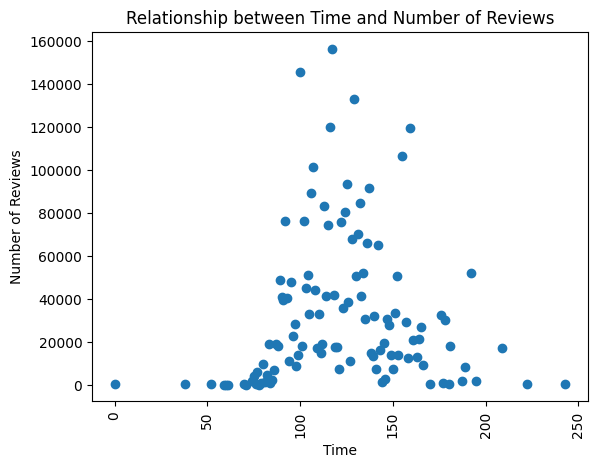

In [8]:
grouped_df = data.groupby('time')['Num of reveiws'].sum().reset_index()
# Create a scatter plot of the time versus the sum of reviews
plt.scatter(grouped_df['time'], grouped_df['Num of reveiws'])
plt.xlabel('Time')
plt.ylabel('Number of Reviews')
plt.title('Relationship between Time and Number of Reviews')
plt.xticks( rotation=90, fontsize=10)

# Show the plot
plt.show()

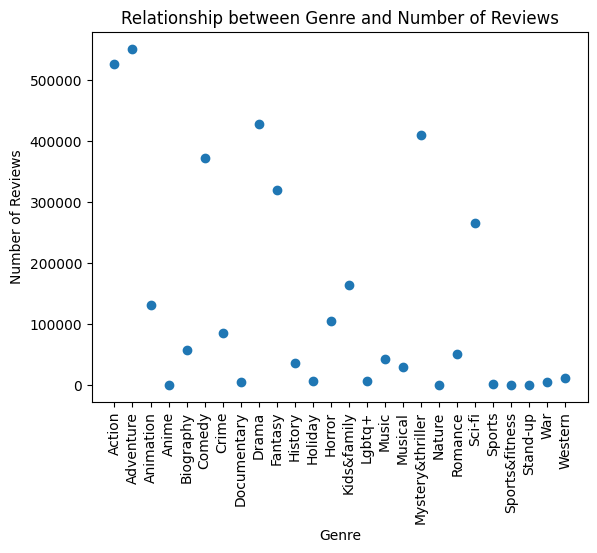

In [45]:
grouped_df = data.groupby('Genre')['Num of reveiws'].sum().reset_index()
# Create a scatter plot of the time versus the sum of reviews
plt.scatter(grouped_df['Genre'], grouped_df['Num of reveiws'])
# Add axis labels and title
plt.xlabel('Genre')
plt.ylabel('Number of Reviews')
plt.title('Relationship between Genre and Number of Reviews')
plt.xticks(grouped_df['Genre'], rotation=90, fontsize=10)
# Show the plot
plt.show()

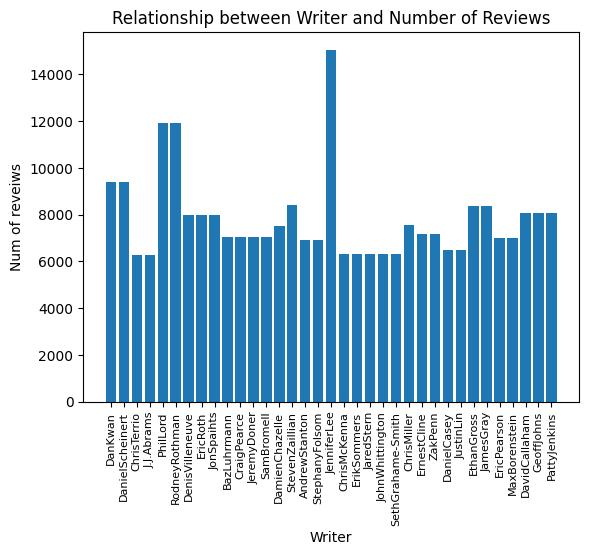

In [16]:
grouped_df = data.groupby(['Unnamed: 0', 'Writer'], as_index=False).agg({'Num of reveiws': 'sum'})

# Filter the DataFrame to only include writers with a sum of reviews more than 1000
filtered_df = grouped_df[grouped_df['Num of reveiws'] >= 6000]

# create scatter plot of the writer versus the sum of reviews for the filtered DataFrame
plt.bar(filtered_df['Writer'], filtered_df['Num of reveiws'])

plt.xlabel('Writer')
plt.ylabel('Num of reveiws')
plt.title('Relationship between Writer and Number of Reviews')
plt.xticks( rotation=90, fontsize=8)
# Show the plot
plt.show()

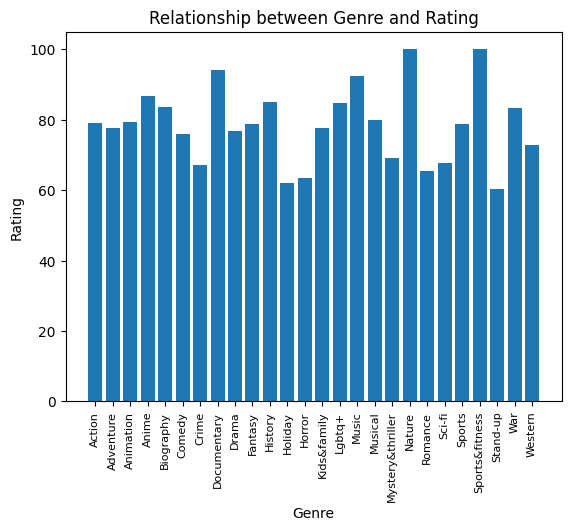

In [28]:
genre_means = data.groupby('Genre')['Rating'].mean()
# create a bar chart of the mean rating for each genre
plt.bar( genre_means.index,genre_means.values)

# add axis labels and title
plt.xlabel('Genre')
plt.ylabel('Average Rating')
plt.title('Average Rating by Genre')

plt.xlabel('Genre')
plt.ylabel('Rating')
plt.title('Relationship between Genre and Rating')
plt.xticks( rotation=90, fontsize=8)
# Show the plot
plt.show()

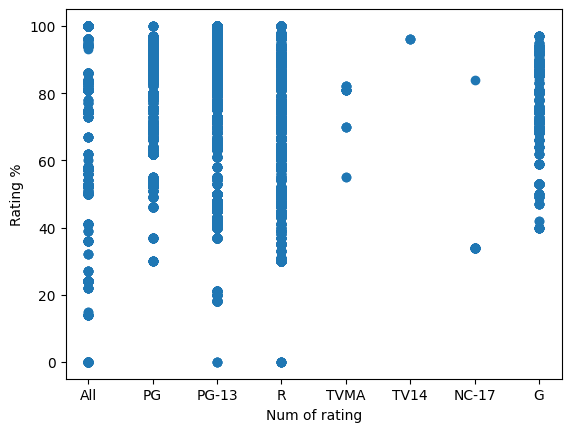

In [13]:
plt.scatter(data["Age"],data["Rating"])
plt.xlabel("Num of rating")
plt.ylabel("Rating %")
plt.show()